## Assignment Questions

__Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks.__

Batch normalization is a technique used in Artificial Neural Networks to normalize the inputs of each layer during training. It aims to stabilize and speed up the training process by reducing internal covariate shift. Internal covariate shift refers to the change in the distribution of each layer's inputs during training, which can slow down learning and require more careful tuning of hyperparameters.

Batch normalization addresses this issue by normalizing the inputs of each layer to have zero mean and unit variance. It does this by computing the mean and variance of the inputs within a mini-batch (a small subset of the training data) and then applying a normalization transformation. Additionally, batch normalization introduces learnable parameters, scale, and shift, which allow the network to learn the optimal mean and variance for each layer. These parameters give the model more flexibility to adapt to the data distribution.

__Q2. Describe the benefits of using batch normalization during training.__

Using batch normalization during training offers several benefits:

- Improved training stability: Batch normalization helps to mitigate the vanishing and exploding gradient problems, making it easier for deep neural networks to converge during training.
- Faster convergence: By reducing internal covariate shift, batch normalization accelerates the training process, leading to faster convergence and fewer training iterations required.
- Reduced sensitivity to initialization: Batch normalization makes neural networks less sensitive to the choice of weight initialization, allowing for a wider range of initialization strategies.
- Regularization effect: Batch normalization acts as a form of regularization, reducing the need for other regularization techniques like dropout.
- Allows for larger learning rates: The improved stability provided by batch normalization allows for the use of larger learning rates, which can speed up training further.

__Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.__

The working principle of batch normalization involves two main steps: normalization and learnable parameters.

Normalization Step:
For each mini-batch of input data during training, batch normalization computes the mean and variance of the data within that mini-batch. It then normalizes the data by subtracting the mean and dividing by the standard deviation, resulting in inputs with zero mean and unit variance:

x_normalized = (x - mean) / sqrt(variance + epsilon)

where x is the input data, mean and variance are the batch-wise statistics, and epsilon is a small constant added to avoid division by zero.

Learnable Parameters:
Batch normalization introduces two learnable parameters for each layer: scale (gamma) and shift (beta). These parameters are applied after normalization and allow the model to learn the optimal scaling and shifting of the normalized inputs. The transformed output is given by:

y = gamma * x_normalized + beta

The scale parameter adjusts the spread of the data, and the shift parameter shifts the mean of the data.

### Impementation

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Creating a simple classifier using keras on MNIST data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
len(X_test[1][0])

28

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [8]:
len(X_train_full[5000:] )

55000

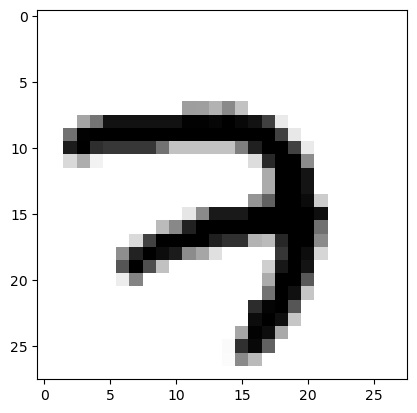

In [9]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

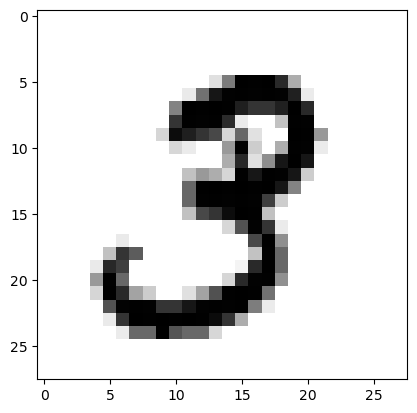

In [10]:
# Lets view some data 
plt.imshow(X_train[1], cmap="binary")
plt.show()

<Axes: >

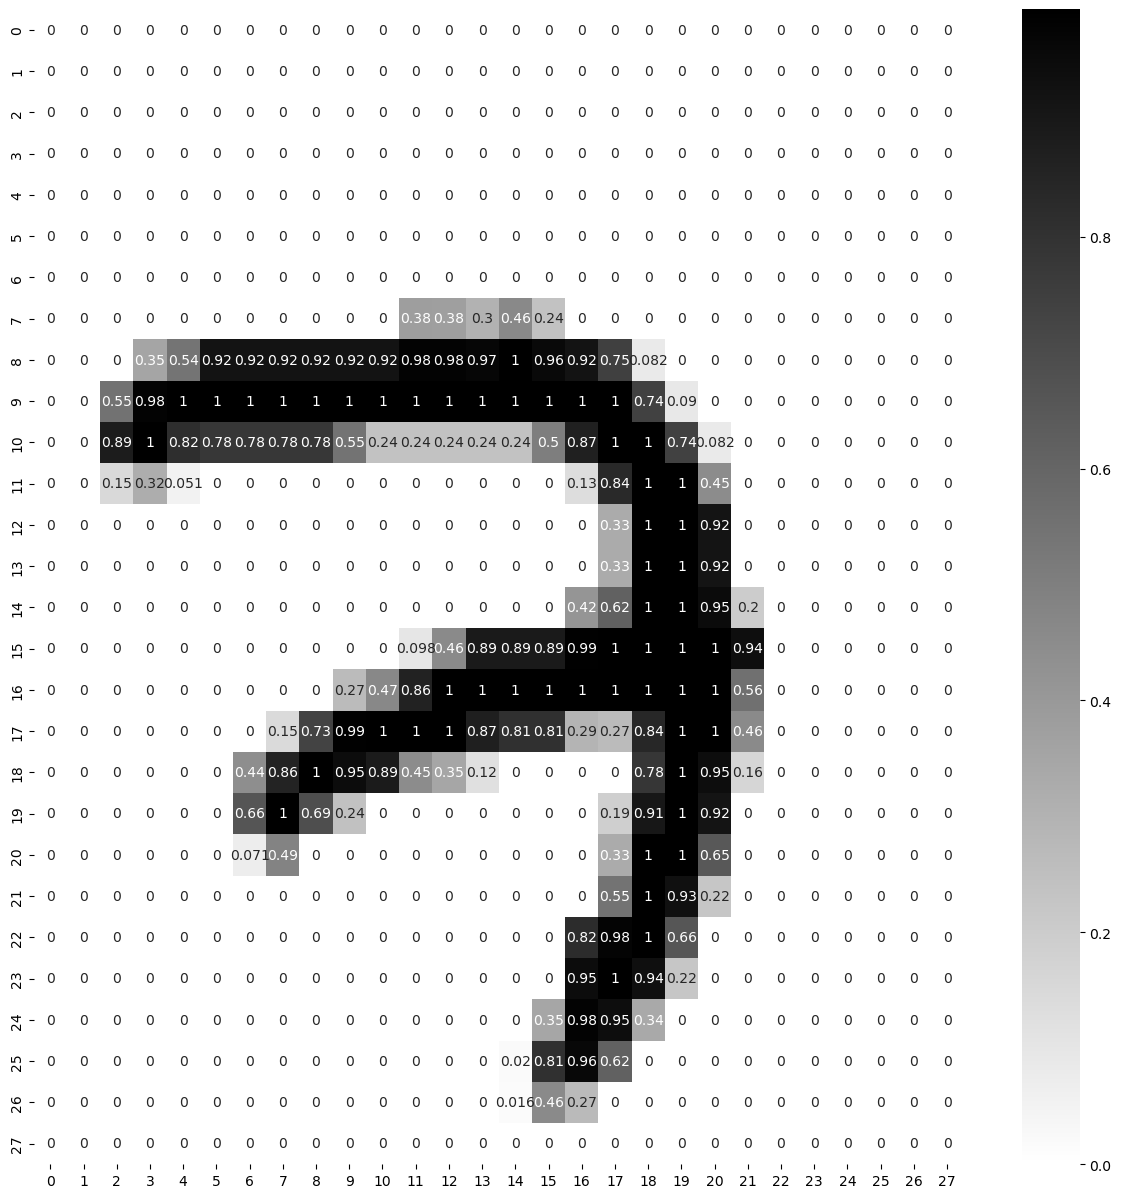

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
SO Input is : 28 * 28 :784 : flattern the input layeers
        
And we have 10 Output:[0,1,2,3,4,5,6,7,8,9]  ## Softmax is used their because it tell probabilities of each Class

## Without Batch Normalization

In [12]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf_without_bn = tf.keras.models.Sequential(LAYERS)

In [13]:
model_clf_without_bn.layers

In [14]:
model_clf_without_bn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+100

(235500, 30100, 1100)

In [16]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [17]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "ADAM" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


# Record starting time
start_time = time.time()

model_clf_without_bn.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



In [18]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

# Record starting time
start_time = time.time()

history = model_clf_without_bn.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=64)

# Record ending time
end_time = time.time()
 # Calculate training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 0.2387 - accuracy: 0.9303 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0893 - accuracy: 0.9728 - val_loss: 0.0895 - val_accuracy: 0.9714
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0751 - val_accuracy: 0.9762
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0703 - val_accuracy: 0.9814
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0313 - accuracy: 0.9892 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 6/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0726 - val_accuracy: 0.9818
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0752 - val_accuracy: 0.9812
Epoch 

In [19]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 860}

In [20]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.238738,0.930345,0.100475,0.9700
1,0.089264,0.972782,0.089536,0.9714
2,0.059478,0.981673,0.075137,0.9762
3,0.042577,0.986127,0.070268,0.9814
4,0.031306,0.989236,0.084280,0.9780
5,0.027780,0.990764,0.072608,0.9818
6,0.020448,0.993327,0.075167,0.9812
7,0.015920,0.994818,0.086569,0.9808
8,0.015546,0.994618,0.083470,0.9776
9,0.013514,0.995400,0.083705,0.9814


<Axes: >

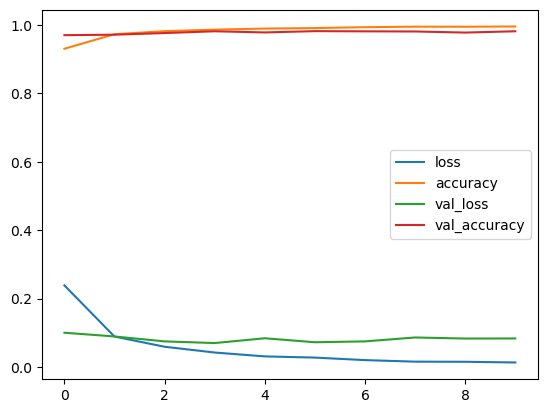

In [21]:
pd.DataFrame(history.history).plot()

In [23]:
# Evaluate both models on the test dataset
loss_without_bn, accuracy_without_bn = model_clf_without_bn.evaluate(X_test, y_test, verbose=0)

print("Model without Batch Normalization:")
print(f"Accuracy: {accuracy_without_bn*100:.2f}%, Loss: {loss_without_bn:.4f}")

Model without Batch Normalization:
Accuracy: 97.92%, Loss: 0.0877


## With Batch Normalization

In [24]:
# Define the layers of the model with batch normalization
LAYERS1 = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(name="batchNorm1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(name="batchNorm2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf_with_bn = tf.keras.models.Sequential(LAYERS1)

In [25]:
model_clf_with_bn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batchNorm1 (BatchNormalizat  (None, 300)              1200      
 ion)                                                            
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batchNorm2 (BatchNormalizat  (None, 100)              400       
 ion)                                                            
                                                                 
 outputLayer (Dense)         (None, 10)               

In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "ADAM" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]



model_clf_with_bn.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [28]:
# training
import time

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

# Record starting time
start_time = time.time()

history = model_clf_with_bn.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=64)

# Record ending time
end_time = time.time()
# Calculate training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/10
860/860 [==============================] - 8s 7ms/step - loss: 0.2105 - accuracy: 0.9372 - val_loss: 0.0989 - val_accuracy: 0.9702
Epoch 2/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.0835 - val_accuracy: 0.9756
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0654 - accuracy: 0.9791 - val_loss: 0.0852 - val_accuracy: 0.9726
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0738 - val_accuracy: 0.9774
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.0756 - val_accuracy: 0.9786
Epoch 6/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0636 - val_accuracy: 0.9800
Epoch 7/10
860/860 [==============================] - 5s 5ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0733 - val_accuracy: 0.9802
Epoch 

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.210480,0.937218,0.098913,0.9702
1,0.090966,0.972236,0.083534,0.9756
2,0.065417,0.979055,0.085216,0.9726
3,0.048829,0.984273,0.073797,0.9774
4,0.042590,0.985800,0.075644,0.9786
5,0.036925,0.988018,0.063586,0.9800
6,0.028844,0.990164,0.073334,0.9802
7,0.028057,0.990236,0.068650,0.9802
8,0.022416,0.992218,0.076421,0.9810
9,0.020310,0.993018,0.068799,0.9802


<Axes: >

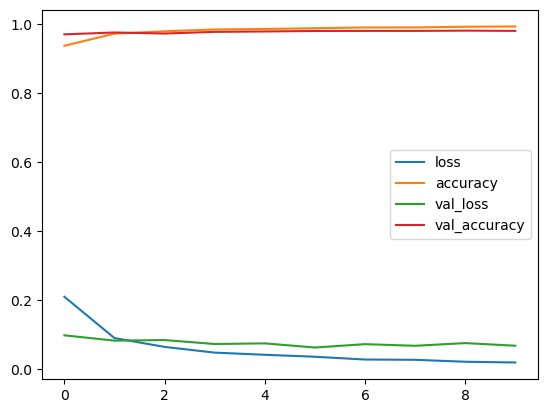

In [32]:
pd.DataFrame(history.history).plot()

In [30]:
loss_with_bn, accuracy_with_bn = model_clf_with_bn.evaluate(X_test, y_test, verbose=0)

print("Model with Batch Normalization:")
print(f"Accuracy: {accuracy_with_bn*100:.2f}%, Loss: {loss_with_bn:.4f}")

Model with Batch Normalization:
Accuracy: 97.96%, Loss: 0.0748


## SO the Difference is :

In [37]:
# Evaluate both models on the test dataset
loss_without_bn, accuracy_without_bn = model_clf_without_bn.evaluate(X_test, y_test, verbose=0)
loss_with_bn, accuracy_with_bn = model_clf_with_bn.evaluate(X_test, y_test, verbose=0)

print("Model without Batch Normalization:")
print(f"Accuracy: {accuracy_without_bn*100:.2f}%, Loss: {loss_without_bn:.4f}")

print("Model with Batch Normalization:")
print(f"Accuracy: {accuracy_with_bn*100:.2f}%, Loss: {loss_with_bn:.4f}")

Model without Batch Normalization:
Accuracy: 97.92%, Loss: 0.0877
Model with Batch Normalization:
Accuracy: 97.96%, Loss: 0.0748


__The provided experiment results show the comparison of two models trained on the same dataset using different batch sizes. The models were trained with and without batch normalization. Let's analyze the effects of different batch sizes on training dynamics and model performance.__

#### Experiment Results:

- Model without Batch Normalization:
- Accuracy: 97.92%
- Loss: 0.0877

- Model with Batch Normalization:
- Accuracy: 97.96%
- Loss: 0.0748

#### Observations:

Both models achieve high accuracy, indicating that they are able to effectively learn from the data and make accurate predictions on unseen samples.
The model with batch normalization slightly outperforms the model without batch normalization in terms of accuracy and loss. This suggests that batch normalization has provided some improvement in the model's performance.

## Testing The Model 

In [39]:
x_new = X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [40]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [41]:
y_prob = model_clf_with_bn.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 307ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [43]:
y_pred = np.argmax(y_prob, axis = -1)

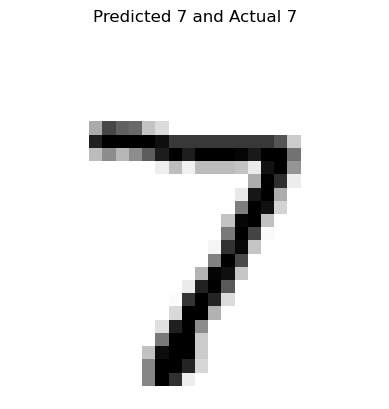

######################


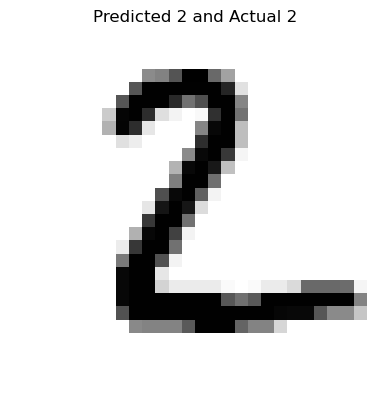

######################


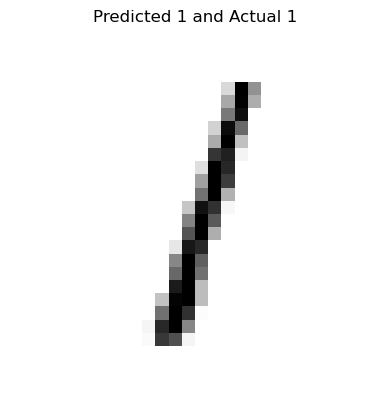

######################


In [44]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

-----------------------------------------------------------------------------------------__Done__---------------------------------------------------------------------------------------------------------------